# Génération des graphiques pour la visualisation des données initiales de la CACPL



## Importation des librairies

In [1]:
import pandas as pd
import json
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

## Connexion à la BDD

In [2]:
fichierConfig = "../../bdd/config.json"

with open(fichierConfig) as fichier:
    config = json.load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

## Récupération et préparation des données

In [3]:
requeteCollecteurs = pd.read_sql_query("SELECT * FROM collecteur JOIN tri ON collecteur.idTri = tri.id LEFT JOIN marque ON collecteur.idMarque = marque.id LEFT JOIN categorie ON collecteur.idCategorie = categorie.id;", engine)
requeteDecheteries = pd.read_sql_query("SELECT * FROM decheterie;", engine)

dataCollecteurs = pd.DataFrame(requeteCollecteurs)
dataDecheteries = pd.DataFrame(requeteDecheteries)


# Renommage des colonnes types pour éviter les confusions (et les erreurs)
cols = []
isTri = True
for column in dataCollecteurs.columns:
    if column == "type":
        if isTri:
            cols.append("typeTri")
            isTri = False
        else:
            cols.append("typeCollecteur")
    else:
        cols.append(column)
dataCollecteurs.columns = cols

# Rajout d'une colonne villes par association code INSEE - ville depuis un dictionnaire (pour faciliter les affichages)
dictVilles = { "06029": "Cannes", "06030": "Le Cannet", "06079": "Mandelieu-la-Napoule", "06085": "Mougins", "06138": "Théoule-sur-Mer"}
for i in dataCollecteurs.index:
    dataCollecteurs.loc[i, "ville"] = dictVilles[dataCollecteurs.loc[i, "codeInsee"]]

dataCollecteurs

2020-10-26 09:46:18,175 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-10-26 09:46:18,176 INFO sqlalchemy.engine.base.Engine {}
2020-10-26 09:46:18,181 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-10-26 09:46:18,182 INFO sqlalchemy.engine.base.Engine {}
2020-10-26 09:46:18,186 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-10-26 09:46:18,187 INFO sqlalchemy.engine.base.Engine {}
2020-10-26 09:46:18,189 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-10-26 09:46:18,190 INFO sqlalchemy.engine.base.Engine {}
2020-10-26 09:46:18,191 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-10-26 09:46:18,192 INFO sqlalchemy.engine.base.Engine {}
2020-10-26 09:46:18,193 INFO sqlalchemy.engine.base.Engine SELECT * FROM collecteur JOIN tri ON collecteur.idTri = tri.id LEFT JOIN marque ON collecteur.idMarque = marque.id LEFT JOIN cat

,objectid,id,volume,quantite,dateInstallation,adresse,adresseComplement,codeInsee,observations,createur,...,idCategorie,idTri,idMarque,id,typeTri,id,nom,id,typeCollecteur,ville
0,1,None,660.0,1,None,Gare tsm,None,06138,None,chpayet,...,1.0,1,1.0,1,om,1.0,Plastic Omnium,1.0,Bac aérien avec cache bac,Théoule-sur-Mer
1,2,None,660.0,3,None,Résidence les terrasses de saint honorat,None,06138,None,chpayet,...,1.0,1,1.0,1,om,1.0,Plastic Omnium,1.0,Bac aérien avec cache bac,Théoule-sur-Mer
2,3,None,660.0,1,None,Prince des iles,None,06138,None,chpayet,...,2.0,1,1.0,1,om,1.0,Plastic Omnium,2.0,Bac aérien sans cache bac,Théoule-sur-Mer
3,4,None,660.0,1,None,Avenue de lerins trottoir de l eglise,None,06138,None,chpayet,...,2.0,1,1.0,1,om,1.0,Plastic Omnium,2.0,Bac aérien sans cache bac,Théoule-sur-Mer
4,5,None,660.0,1,None,Avenue de lerins angle traverse magasin souvenirs,None,06138,None,chpayet,...,2.0,1,1.0,1,om,1.0,Plastic Omnium,2.0,Bac aérien sans cache bac,Théoule-sur-Mer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,963,None,NaN,1,None,1102 avenue du maréchal juin,None,06085,None,chpayet,...,NaN,5,NaN,5,vêtement,NaN,None,NaN,None,Mougins
963,964,None,NaN,1,None,Chemin de la plaine,None,06085,None,chpayet,...,NaN,5,NaN,5,vêtement,NaN,None,NaN,None,Mougins
964,965,None,NaN,1,None,Chemin du refuge,None,06085,None,chpayet,...,NaN,5,NaN,5,vêtement,NaN,None,NaN,None,Mougins
965,966,None,NaN,3,None,Avenue lamartine,None,06085,None,chpayet,...,NaN,5,NaN,5,vêtement,NaN,None,NaN,None,Mougins


## Affichage des graphiques

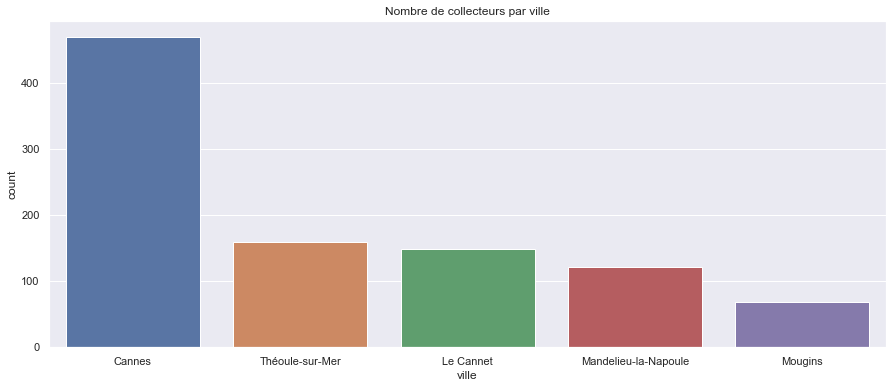

In [4]:
sns.set(style="darkgrid")
plt.figure(figsize= [15, 6])
plt.title("Nombre de collecteurs par ville")
sns.countplot(x="ville", data=dataCollecteurs, order=dataCollecteurs["ville"].value_counts().keys())

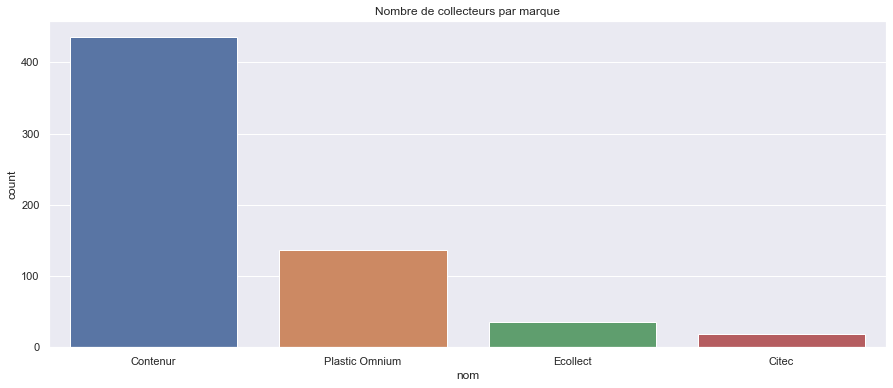

In [5]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collecteurs par marque")
sns.countplot(x="nom", data=dataCollecteurs, order=dataCollecteurs["nom"].value_counts().keys())

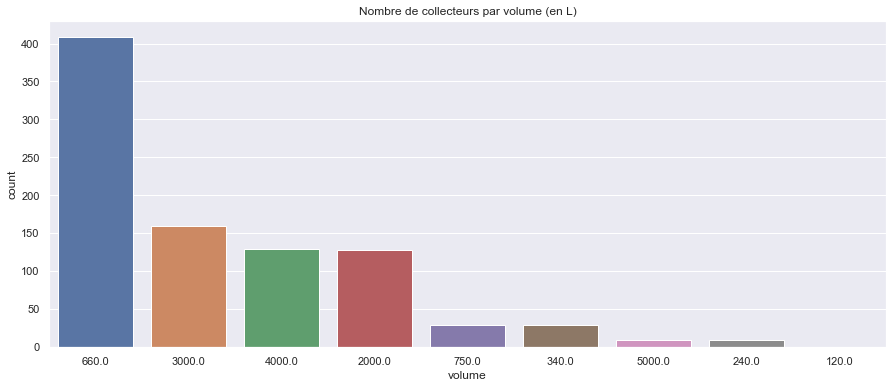

In [6]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collecteurs par volume (en L)")
sns.countplot(x="volume", data=dataCollecteurs, order=dataCollecteurs["volume"].value_counts().keys())

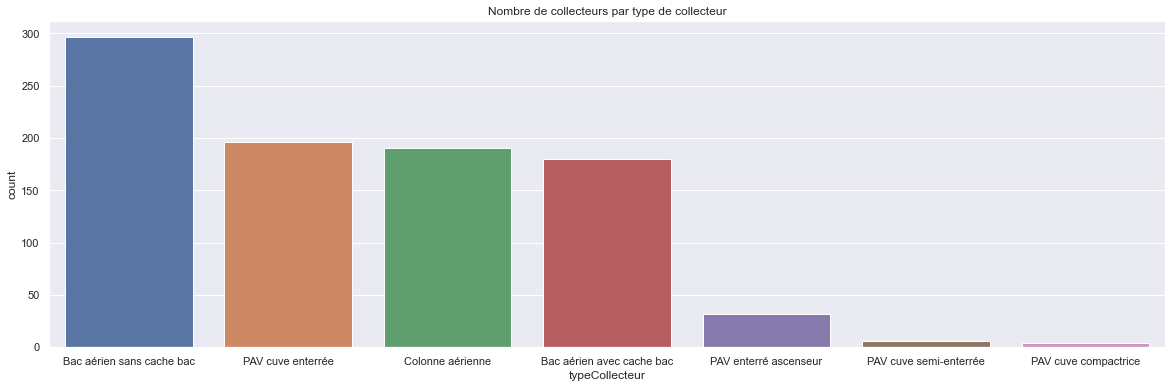

In [7]:
plt.figure(figsize= [20, 6])
plt.title("Nombre de collecteurs par type de collecteur")
sns.countplot(x="typeCollecteur", data=dataCollecteurs, order=dataCollecteurs["typeCollecteur"].value_counts().keys())

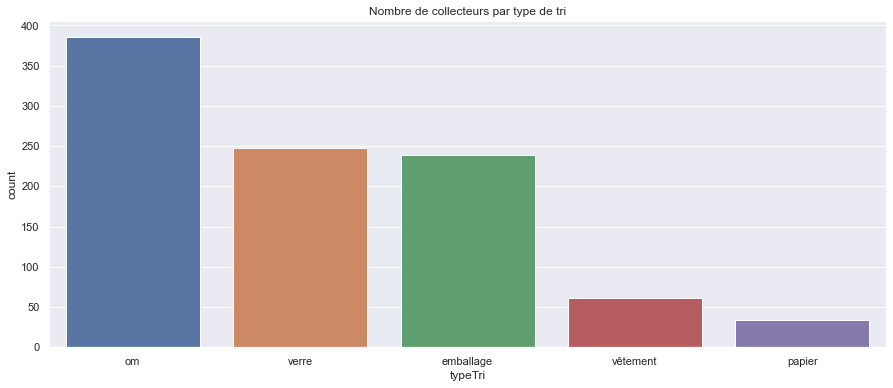

In [8]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collecteurs par type de tri")
sns.countplot(x="typeTri", data=dataCollecteurs, order=dataCollecteurs["typeTri"].value_counts().keys())

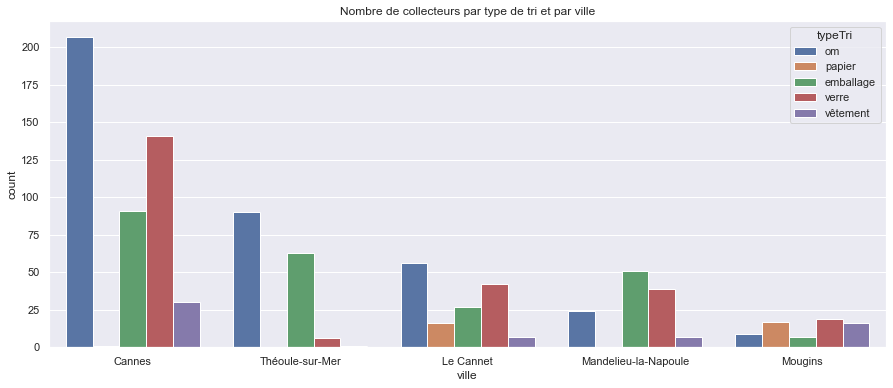

In [9]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collecteurs par type de tri et par ville")
sns.countplot(x="ville", hue="typeTri", data=dataCollecteurs, order=dataCollecteurs['ville'].value_counts().keys())

Text(0.5, 1.0, 'Répartition des collecteurs par ville')

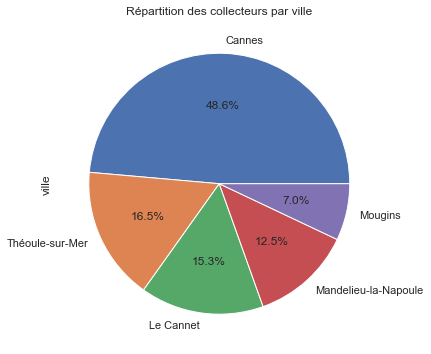

In [10]:
plt.figure(figsize= [15, 6])
dataCollecteurs["ville"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des collecteurs par ville")

Text(0.5, 1.0, 'Répartition des collecteurs par type de tri')

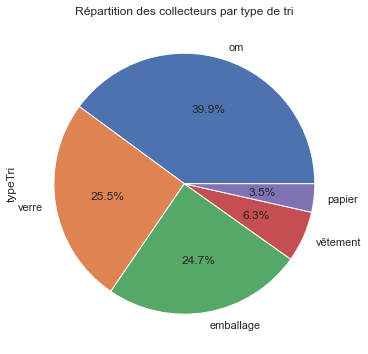

In [11]:
plt.figure(figsize= [15, 6])
dataCollecteurs["typeTri"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des collecteurs par type de tri")

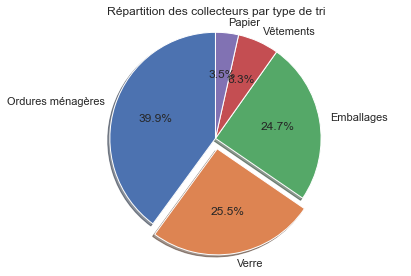

In [12]:

labels = ['Ordures ménagères', 'Verre', 'Emballages', 'Vêtements', "Papier"]
explode = (0, 0.1, 0, 0, 0)  
fig, ax = plt.subplots()
ax.pie(dataCollecteurs["typeTri"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title("Répartition des collecteurs par type de tri")
plt.tight_layout()
plt.show()